## **Titanic Dataset: Who Most Likely Survived?** 
---


By Cohort B Team 6: (Sylar)Jiajian Guo, Lequn Yu, Qiqi Tang, Scott McCoy, Tiam Moradi

## **Proposal**

Our goal for the project is to use python to further explore the Titanic dataset and the relationship between passenger features and their chances of survival. We plan to use this improved understanding to optimize our Machine Learning model to make better predictions. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# formatting options cell
sns.set_context('notebook')
sns.set_style('darkgrid')

In [4]:
df = pd.read_csv('https://www.openml.org/data/get_csv/16826755/phpMYEkMl', na_values='?')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## **Exploratory Data Analysis**

The Titanic dataset we have here includes 14 columns. The dependent variable is 'survived' and the remaining 13 columns are independent variables. There are 1309 data entries which means we have in total 1309 people for this dataset. There are only 4 columns missing a lot of data: 'cabin', 'boat', 'body',and 'home.dest', while other variables have mostly non-null data. Most of the columns are categorical.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


We can see some useful statistics listed below with the describe method. The total survival rate was 38.2% on Titanic which gives us a general sense of how serious the Titanic disaster event was. Another useful piece of informatino we can tell is that most passengers were mid-age with an interquartile range of 21-39 years old. Lastly, we can guess the distribution of 'fare' is highly skewed with outliers from its statistics here.

In [ ]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


### **Examining Survival Based on Each Feature**

Which passenger features were most associated with surviving the shipwreck? 

The titanic dataset has a number of features about each passenger that could be used as indicators affecting their chances of surviving. We analyzed each feature independently and found that the most significant indicators of survival were sex, passenger class, and age. Our analysis focuses on these features, but also discusses other relevant features that have potential predictive capability.

#### **Sex**
After calculating survival rates based on sex, we found that female passengers had a significantly higher survival rate at 72.7%, to male passengers at 19.1%.

In [ ]:
df.pivot_table(values='survived',index='sex')

,survived
sex,
female,0.727468
male,0.190985


The following two charts illustrate the striking divide between survival rates of men and women. Even though a majority of passengers were male, women made up more than two thrids of survivors.

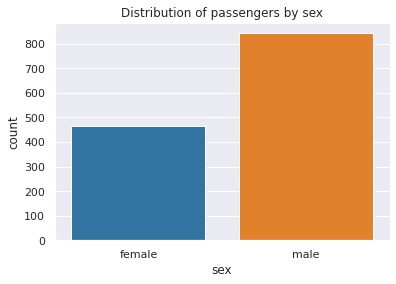

In [ ]:
# fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True);

sns.countplot(data = df, x='sex');
plt.title('Distribution of passengers by sex');


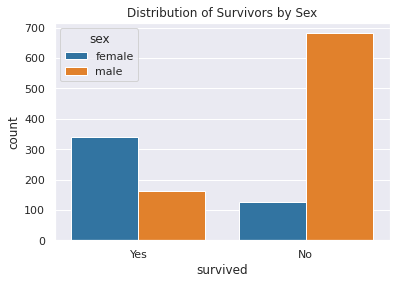

In [ ]:
sns.countplot(data = df, x=df['survived'].map({1:'Yes', 0:'No'}), hue = 'sex');
plt.title('Distribution of Survivors by Sex');

#### **Passenger Class**

When looking into survival rate based on passenger class, we see that class 1 had the highest survival rate of 61.9% , followed by class 2 with 43%, and finally class 3 with 25.5%. One thing to also notice is that there are more passengers in class 3 than class 1 and class 2 combined. Our hypothesis for why there is a big disparity of the survival rates is because of the locations of the passenger rooms on the titanic for a different passenger classes.

In [ ]:
df.pivot_table(values='survived',index='pclass')

,survived
pclass,
1,0.619195
2,0.429603
3,0.255289


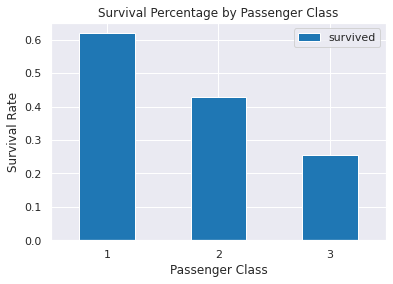

In [ ]:
df.pivot_table(values='survived',index='pclass').plot(kind = 'bar');
plt.title('Survival Percentage by Passenger Class');
plt.ylabel('Survival Rate');
plt.xlabel('Passenger Class');
plt.xticks(rotation=0);

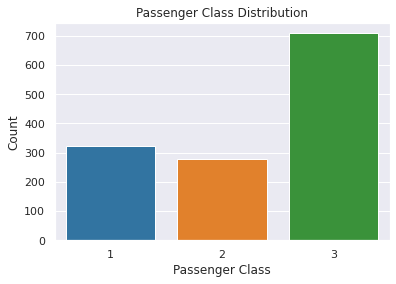

In [ ]:
sns.countplot(data = df, x = 'pclass');
plt.title('Passenger Class Distribution');
plt.ylabel('Count');
plt.xlabel('Passenger Class');

#### **Age**

To compare the effect of age on survival, we divided our passengers into several distinct age categores. We define a child as a person under 18, an adult as a person between the ages of 18 and 50, and Elder as a person over 50 years old. Children had the highest survival rate, followed by adults and elderly. With the dataset, we also see that there was a quite large group created called None which means we had Null values within the age column of our dataset.

In [ ]:
dfage = df.copy()
group_names = ['Child', 'Adult', 'Elderly']
ranges = [0,17,49, np.inf]
dfage['age_group'] = pd.cut(dfage['age'], bins = ranges, labels = group_names)
dfage.pivot_table(values='survived', index = 'age_group')

,survived
age_group,
Child,0.525974
Adult,0.386189
Elderly,0.400000


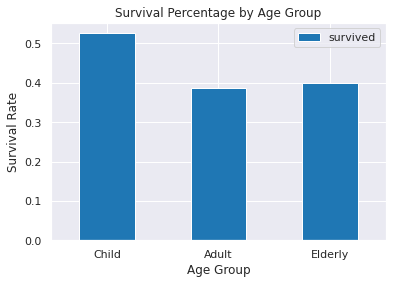

In [ ]:
dfage.pivot_table(values='survived', index = 'age_group').plot(kind = 'bar');
plt.title('Survival Percentage by Age Group');
plt.ylabel('Survival Rate');
plt.xlabel('Age Group');
plt.xticks(rotation=0);

The survival rate for children was higher than for any other age group, but the effect is less than we expected. Later we will show that the correlation between age and passenger class somewhat masks the predictive effect of age, and that when viewed independently from passenger class, age is a powerful predictor of survival.

#### **Fare**

Here we have defined the fare to be cheap if the price was under 10 dollars, if the fair was over 10 but less than 30 dollars then it is mid , and if the fare price was over 30 dollars, then we would define that as expensive. There was also a large portion of the passengers that had missing values, however for the data that we do have, high level fare prices had the highest survival rate, followed by mid and cheap fare tickets. 

> Survival Rate by Fare Group:

In [ ]:
group_names = ['Cheap', 'Mid', 'Expensive']
ranges = [0,10,30, np.inf]
df['fare_group'] = pd.cut(df['fare'], bins = ranges, labels = group_names)
df.pivot_table(values='survived', index = 'fare_group')

,survived
fare_group,
Cheap,0.227848
Mid,0.409283
Expensive,0.571429


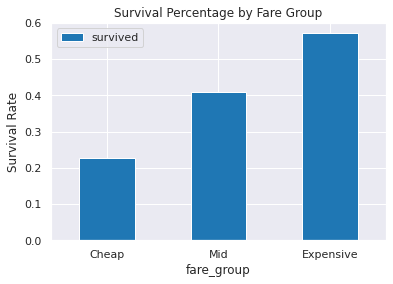

In [ ]:
df.pivot_table(values='survived', index = 'fare_group').plot(kind = 'bar');
plt.title('Survival Percentage by Fare Group');
plt.xticks(rotation=0)
plt.ylabel('Survival Rate');


One possible explanation for the high survival rate of passengers with expensive tickets is that first class passengers (the class with the highest survival percentage) paid significantly more for their tickets on average. Later we will show that even after controlling for passenger class, higher fares are still associated with higher survival rates.

> Average Fare and Survival Percentage by Passenger Class

In [ ]:
dff = df.pivot_table(index = 'pclass', values = ['fare', 'survived'])
dff.columns = ['Average Fare', 'Survival Percentage']
dff

,Average Fare,Survival Percentage
pclass,,
1,87.508992,0.619195
2,21.179196,0.429603
3,13.302889,0.255289


#### **Port Embarked**

Data shows us that Cherbourg, France is the port with the highest survival rate.

> Survival Percentage by Port of Embarkation

In [ ]:
dfpe = df.pivot_table(values='survived',index='embarked')
dfpe.columns = ['Survival Percentage']
dfpe['Number of Passengers'] = df.groupby('embarked').count()['survived']
dfpe['Number of Survivors'] = df[df['survived'] == 1].groupby('embarked').count()['survived']
dfpe[['Number of Passengers', 'Number of Survivors', 'Survival Percentage']]

,Number of Passengers,Number of Survivors,Survival Percentage
embarked,,,
C,270,150,0.555556
Q,123,44,0.357724
S,914,304,0.332604


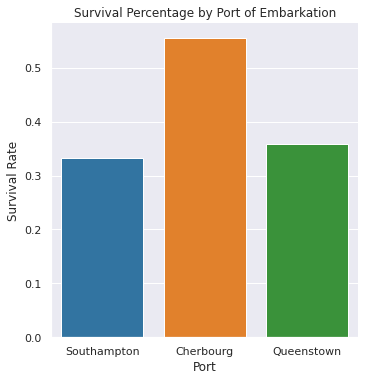

In [ ]:
sns.catplot(data = df, kind = 'bar', x = df['embarked'].map({'C': 'Cherbourg', 'S':'Southampton', 'Q': 'Queenstown'}), y = 'survived', ci = None);
plt.title('Survival Percentage by Port of Embarkation');
plt.ylabel('Survival Rate');
plt.xlabel('Port');


We also see that a higher proportion of passengers embarking from Cherbourg were first class compared to the other two ports. This raises the question if the high survival rate can actually be attributed to the port itself, or whether it has more to do with correlation between port and passenger class.  Later we will show that passengers embarking from Cherbourg had a higher survival rate regardless of their class. 

 Distribution of Passengers by Port and Passenger Class

In [ ]:
df1 = df.pivot_table(values='survived',index=['embarked', 'pclass'], aggfunc = 'count')
df1.columns = ['Count']
df1

Count
embarked pclass       
C        1         141
         2          28
         3         101
Q        1           3
         2           7
         3         113
S        1         177
         2         242
         3         495

In [ ]:
df.groupby(['pclass', 'embarked']).count()['survived'].unstack()

embarked,C,Q,S
pclass,,,
1,141,3,177
2,28,7,242
3,101,113,495


#### **Familial Relationships (sibsp / parch)**

First aspect to note is that 891 passengers did not have a sibling or a spouse, yet this demographic contributed to over 68 percent of the population. It is also interesting that the group with the highest survival rate had atleast a spouse or siblings on board the Titanic. Once we look at passnegers having 2 siblings or more, we see a decline in the survival rate.

> Survival Percentage by Number of Companions

In [ ]:
group_names = ['Alone', '1-2 companions', 'more than 2 companions']
ranges = [-1,0,2, np.inf]
df['sibsp_group'] = pd.cut(df['sibsp'], bins = ranges, labels = group_names)
df.pivot_table(values='survived', index = 'sibsp_group')

,survived
sibsp_group,
Alone,0.346801
1-2 companions,0.504155
more than 2 companions,0.157895


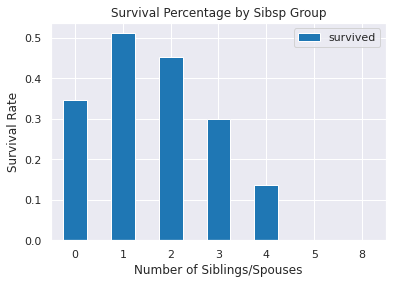

In [ ]:
df.pivot_table(values='survived', index = 'sibsp').plot(kind = 'bar');
plt.title('Survival Percentage by Sibsp Group');
plt.xticks(rotation=0)
plt.xlabel('Number of Siblings/Spouses');
plt.ylabel('Survival Rate');
# sns.set_style("darkgrid")

### **Correlation Between Features**

> Can we make meaningful observations about the relationships between our features, and use this to improve our analysis or classification model?

In [ ]:
co = df.copy()
co['sex'] = co['sex'].map({'male':0, 'female':1}) 
co['pclass'] = co['pclass'].map({1:3, 2:2, 3:1})    #switched numbering of passenger classes for correlation calc

corr = co.corr()
corr

,pclass,survived,sex,age,sibsp,parch,fare,body
pclass,1.000000,0.312469,0.124617,0.408106,-0.060832,-0.018322,0.558629,0.034642
survived,0.312469,1.000000,0.528693,-0.055513,-0.027825,0.082660,0.244265,NaN
sex,0.124617,0.528693,1.000000,-0.063646,0.109609,0.213125,0.185523,0.015903
age,0.408106,-0.055513,-0.063646,1.000000,-0.243699,-0.150917,0.178739,0.058809
sibsp,-0.060832,-0.027825,0.109609,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,-0.018322,0.082660,0.213125,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,0.558629,0.244265,0.185523,0.178739,0.160238,0.221539,1.000000,-0.043110
body,0.034642,NaN,0.015903,0.058809,-0.099961,0.051099,-0.043110,1.000000


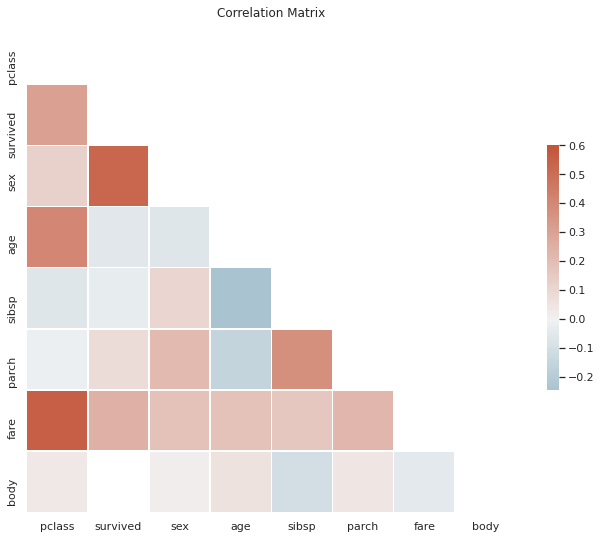

In [ ]:
sns.set_style('white')

mask = np.triu(np.ones_like(corr, dtype=bool))  

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr,  mask=mask,cmap=cmap, vmax=.6, center=0,
            square=True, linewidths=.55, cbar_kws={"shrink": .5});
plt.title('Correlation Matrix')
plt.show()

Very high positive correlation between: 
* Sex and survived - Shows how important sex feature is for prediction.
* Age and pclass (1st class passengers are more likely to be older) - Might explain why age didn't have strong predictive value we expected. 
* Fare and pclass - Makes sense that higher class tickets cost more. We need to further explore this relationship to determine the predictive power of fare.


#### Age vs Passenger Class

> Average age by passenger class:

In [ ]:
df.pivot_table(values = 'age', index = 'pclass')

,age
pclass,
1,39.159918
2,29.506705
3,24.816367


First class passengers are on average almost 10 years older than second class passengers, and 15 years older than third class passengers. <br >

> Indented block


Since the older first class had the highest survival percentage, are we underestimating the predictive value of age when we just look at survival rates of passengers as a whole? <br > 
We broke out the distribution of age by passenger class to get a better understanding.

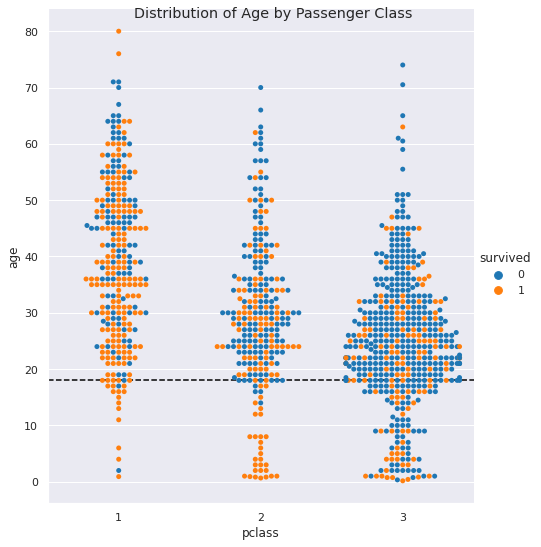

In [ ]:
sns.set_style('darkgrid')
g = sns.catplot(data = df, y = 'age', x = 'pclass', kind = 'swarm', hue = 'survived',height=7.5, aspect=7/8);
plt.axhline(18, color="k", linestyle="--", alpha=1);
g.fig.suptitle('Distribution of Age by Passenger Class')
plt.show()

> Survival by passenger class and age group:





In [ ]:
df_p = df[df['age'] < 18].pivot_table(values = 'survived', index = 'pclass')
df_p.columns = ['Child']
df_p['Adult'] = df[df['age'] >= 18].pivot_table(values = 'survived', index = 'pclass')
df_p['Difference'] = df_p['Child'] - df_p['Adult']
df_p

,Child,Adult,Difference
pclass,,,
1,0.866667,0.624535,0.242131
2,0.878788,0.377193,0.501595
3,0.367925,0.232911,0.135013


Here we see that for each passenger class, being under the age of 18 results in a higher chance of survival.

Our visualization also shows that a majority of passengers under the age of 18 were in 3rd class, which would drag down the survival rate of the age group as a whole.

> Distribution of passenger class for child passengers:

In [ ]:
df[df['age'] < 18 ]['pclass'].value_counts(normalize=True) * 100

3    68.831169
2    21.428571
1     9.740260
Name: pclass, dtype: float64

When viewed independently from passenger class, we see that age is a powerful predictor of survival.

#### Fare vs Passenger Class

We previously found that a higher fare was associated with a higher rate of survival. But was that effect more reflective of 1st class passengers paying higher fares? 

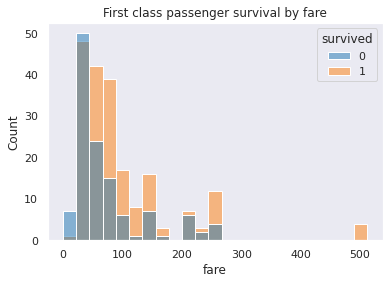

In [ ]:
sns.set_style('dark')
sns.histplot(data = df[ df['pclass'] == 1], x = 'fare', hue = 'survived');
plt.title('First class passenger survival by fare');

Here we see that among all first class passengers, higher fares are associated with greater chance of survival.

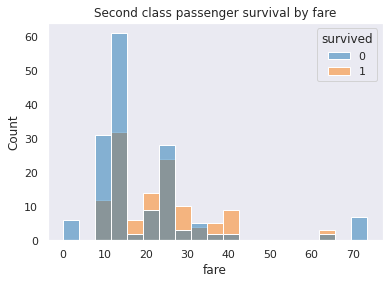

In [ ]:
sns.histplot(data = df[ df['pclass'] == 2], x = 'fare', hue = 'survived');
plt.title('Second class passenger survival by fare');

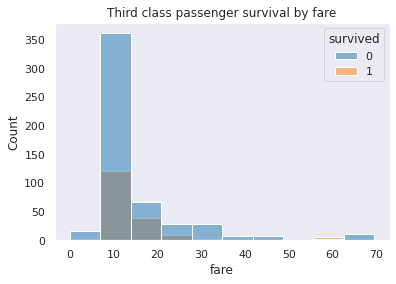

In [ ]:
sns.histplot(data = df[ df['pclass'] == 3], x = 'fare', hue = 'survived', bins = 10);
plt.title('Third class passenger survival by fare');

For second and third class passengers, the effect is not as profound, but we can still see that passengers paying higher fares are more likely to survive regardless of their passenger class.

#### Port of Embarkation vs Passenger Class

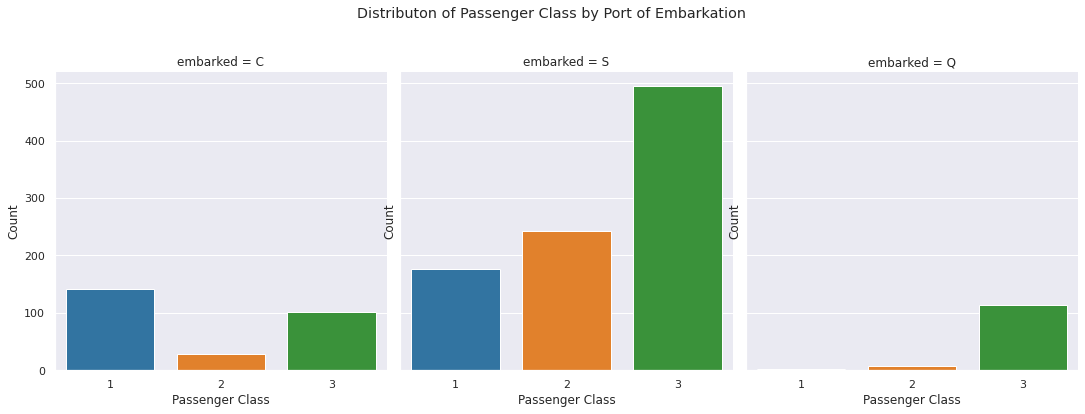

In [ ]:
sns.set_style('darkgrid')
g= sns.catplot(data = df, x = 'pclass', kind = 'count', col = 'embarked', col_order = ['C', 'S', 'Q']);
g.fig.suptitle('Distributon of Passenger Class by Port of Embarkation', y = 1.1);
g.set(xlabel = 'Passenger Class', ylabel = 'Count');

We saw earlier that passengers embarking from Cherbourg had the highest rate of survival. However this chart also shows that these passengers were much more likely to be first class than either of the other ports. Does this skew the survival rate by port? To find out, we broke out the survival rates by passenger class below.

> Survival Percentage by Port and Passenger Class:

In [ ]:
dfch = df[df['embarked'] == 'C'].pivot_table(values='survived',index='pclass')
dfch['Other Port'] = df[df['embarked'].isin(['S', 'Q'])].pivot_table(values = 'survived', index = 'pclass')
dfch.columns = ['Cherbourg Surival Rate', 'Other Ports Survival Rate']
dfch['Difference'] = dfch['Cherbourg Surival Rate']- dfch['Other Ports Survival Rate']
dfch

,Cherbourg Surival Rate,Other Ports Survival Rate,Difference
pclass,,,
1,0.687943,0.561111,0.126832
2,0.571429,0.413655,0.157774
3,0.366337,0.236842,0.129495


This table shows that passengers who embarked from Cherbourg had a higher survival percentage than the other two ports, regardless of their class.

In [ ]:
import scipy as scipy
# 1st class C vs non-C embark survival diff significance
scipy.stats.ttest_ind(pd.array(df.loc[(df['embarked'] == 'C')&(df['pclass']==1)]['survived']),pd.array(df.loc[(df['embarked'] != 'C')&(df['pclass']==1)]['survived']))

Ttest_indResult(statistic=2.2502008937937505, pvalue=0.025113026592709285)

In [ ]:
#2nd class
scipy.stats.ttest_ind(pd.array(df.loc[(df['embarked'] == 'C')&(df['pclass']==2)]['survived']),pd.array(df.loc[(df['embarked'] != 'C')&(df['pclass']==2)]['survived']))

Ttest_indResult(statistic=1.6006338547131405, pvalue=0.11060616262531942)

In [ ]:
#3rd class
scipy.stats.ttest_ind(pd.array(df.loc[(df['embarked'] == 'C')&(df['pclass']==3)]['survived']),pd.array(df.loc[(df['embarked'] != 'C')&(df['pclass']==3)]['survived']))

Ttest_indResult(statistic=2.7750435335378465, pvalue=0.005665227602576919)

## **Machine Learning**

For this iteration of the machine learning section, we decided to make a class called project, which would handle the preprocessing steps, as well as train two different algorithms, Logistic Regression and XGBoost, which stands for Extreme Gradient Boosting Trees. \


### **Preprocessing**
For preprocessing, methods depended on the type of model the user decides to use. If linear_model == True, then our preprocessing steps are going to be similar to when we worked on BigQuery: we One Hot Encoded the pclass, sex, and embarked section, kept the numerical features on their same scale. One thing we tried differently was creating a family feature that was the summation of the Sibsp and Parch features. All other features were dropped.
If linear_model == False, then we took a slightly different approach to preprocessing our data. We still created the family feature, and dropped irrelevant columns, however we tried to fill in the null values of the cabin, as well as not create One Hot Encodings of the categorical features. The reason we are even working with the cabin feature is because one of the properties of XGBoost is that it can handle null values. First we readjusted the cabin feature to be labels; we took our the letter in the cabin value and reassigned them to a label. For the null values, we gave them a label of 0, but the non-null values received a label between 1-7. We also decided against using one hot encoding because for Tree Based methods, it is better for these models to split on nodes based on the labels, it helps the Tree method perforrm better with rarer categories ( the non-null values of cabin for instance) and helps the Tree methods make fewer splits. 

### **Performance**
After creating and evaluating our model, how can we tune and re-train it to increase the accuracy of predictions?

For the LogisticRegression, we still used L1 regularization, but we also used an algorithm called GridSearchCV for hyperparameter tuning, in order to find the right combination of hyperparameters for the model to perform the best. Finally unlike the BigQuery model, we used a straify parameter within the train_test_split function in order to keep the class distribution the same as in the training set; in BigQuery, the splitting of the data was done by random and did not take class distribution into account. \

With this iteration of the LogisticRegression model, here are the metrics: 

accuracy: **79.8%** \
precision: **77%**	\
recal': **67.2%** \
f1_score: **71.8%** \
roc_auc: **77.4%** \

We performed very similar to the model produced in BigQuery; our recall improved by 6 percent, while our precision dropped by 6 percent and our roc_auc dropped by 7 percent. Interestingly enough our F1-score remained the same. Therefore, even though the model did not generate features that were more likely to seperate the data, it still is just as good as the model done in the cloud.  

Now here is the performance of the XGBoost model: 

accuracy: **82%** \
precision: **83.7%**	\
recall: **65.6%** \
f1_score: **73.5%** \
roc_auc: **78.9%** \

In comparison to both Logistic Regression models, this model performs slightly better with a higher f1-score. This model was able to capture around the same metrics of precision and accuracy as BigQuery model , while having a higher AUC or the ROC curve in comparison the the Logistic Regression trained in python. The one interesting not with these metrics is that the XGBoost had a hard time trying to understand passengers who did not survive, and this could have been because of the inclusion of the cabin feature, but one could check feature importance or use SHAP values to see how big of a role cabin played.

### **Cross Validation Results: How do the models compare?**

As stated, with GridSearch, where we are able to find the cominbation of hyperparameters that achieved the best results on each of the validation sets , where we have 5 - fold validation. With the cells in the Cross Validation scores section, we have the best performing hyperparameters for the Logistic Regression and XGBoost model we have. First thing to notice is that the Logistic Regression model had the hightest overall test score on all of the cross validation sets, but we can see that the XGBoost model was able to consistently achieve over 80 percent on 4 out of the 5 splits ; this is also seen with the standard deviation of the test scores being lower in comparison to the Logistic Regression model as well. 

Some more information that we can see from the following series is that with the Logistic Regression model is that there were 30 combinations of hyperparameters that achieved the average test scores, where as the XGBoost model only had 2 models that have achieved the average test scores. That alone tells us a couple of things. First is that overall, the Logistic Regression model with certain hyperparameters that are within a certain range are all capable of performing the same and converge to the best possible scroes. On the otherhand, we can see that hyperparameter tuning significantly improved the XGBoost model, we the limitied amount of comibnations of rank 1 scores means that the slightest tuning of features improved the performance of the model.

Overall between the two models, in a real world scenario, we would most likely use the XGBoost model, as it has a higher test accuracy in comparison to the Logistic Regression, for both the validation sets as well as the test set.


### **"Project" Python Class**

In [5]:
!pip install shap

     |████████████████████████████████| 327kB 8.2MB/s 
  Created wheel for shap: filename=shap-0.37.0-cp36-cp36m-linux_x86_64.whl size=463910 sha256=224265c638707a1d09e4a0ac94260f0b6b8e2be369ca1dd888dbeca439b54c04
  Stored in directory: /root/.cache/pip/wheels/df/ad/b0/aa7815ec68850d66551ef618095eccb962c8f6022f1d3dd989
Successfully built shap


In [6]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler as minmax
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score , roc_auc_score
import shap

class project():
    def __init__(self,**kwargs):
        assert isinstance(kwargs['path'],str)
        assert isinstance(kwargs['linear_model'],bool)
        assert isinstance(kwargs['seed'],int)

        self.path = kwargs['path']
        self.linear_model = kwargs['linear_model']
        self.seed = kwargs['seed']

    def preprocessing(self):
        """
            Here we are giving the path of dataset, prepare the dataset to be processed in a machine learning model
            Input:
                path: str of the path to the dataset 
                split_labels: bool that either returns the whole dataframe or the features and the labels seperately 
                linear_model: bool that preprocesses the data differently depending on if the model we use is either 
                            a linear classifier or a tree based method
                baseline: Here we are going to be making a baseline model for either method
            Output:
                df or X , y if split_labels = True
        """
        
        df = pd.read_csv(self.path,na_values='?')
    
        # create categorical vars  
        if self.linear_model:
            print('We are turning categorical features into ohc and dropping some unhelpful columns...')
            df = pd.get_dummies(df,columns=['pclass','sex','embarked'])
            df['family_size'] = df['sibsp'] + df['parch']
            df.drop(['name','boat','home.dest','sex_male','body','cabin','ticket','sibsp','parch','pclass_3','embarked_S'],axis=1,inplace=True)
            # df.dropna(axis=0,inplace=True)
            df['age'].fillna(df['age'].median(),inplace=True)
            df['fare'].fillna(df['fare'].median(),inplace=True)

        else:
            df = pd.get_dummies(df,columns=['pclass','sex','embarked'])
            df['family_size'] = df['sibsp'] + df['parch']
            df['cabin'] = df[df.cabin.notnull()].cabin.apply(lambda cabin: cabin[0]).map({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7})
            df.drop(['name','boat','home.dest','sex_male','body','ticket','sibsp','parch','pclass_3','embarked_S'],axis=1,inplace=True)
            df.fillna(0,inplace=True)
        # print(df.info())

    
        label = df['survived']
        df.drop(['survived'],axis=1,inplace=True)
        
        self.df = df 
        self.label = label

    def demistify_model(self,model,X_test):
      ## Depending on the model, we are going to be either coefficients, 
      if self.linear_model:
        return pd.DataFrame(model.coef_,columns=self.df.columns)
      
      else:
        ## First we are going to be printing the feature importance 
        print('Printing the SHAP Values of the ')
        shap_values_t1 = shap.TreeExplainer(model).shap_values(X_test)
        return shap.summary_plot(shap_values_t1,X_test)
  
    @classmethod 
    def cv_scores(self,model):
      # Here we are going to see the CV scores from GridSearch
      return model.cv_results_


    def run_ml(self):
        # Here we are going to be running the machine learning model
        # make sure that the params 
        print('Training the model.....',end='\n')
        X , y = self.df, self.label
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25,random_state=self.seed,stratify=y)
       
        if self.linear_model:
            lr = LogisticRegression()
            clf = GridSearchCV(estimator=lr,param_grid={'penalty':['l1'],
                    'solver':['liblinear'],
                    'C':list(np.arange(0.005,1,.015)),
                    'max_iter':list(range(50,500,15)),
                    'random_state':[self.seed]},cv=5)

        else:
            xgboost = GradientBoostingClassifier()
            clf = GridSearchCV(estimator=xgboost,param_grid={'loss':['deviance','exponential'],
                                                         'learning_rate':list(np.arange(0.005,1,.015)),
                                                         'n_estimators': [100],
                                                         'max_depth':list(range(3,10,2)),
                                                         'random_state':[self.seed]},cv=5) 
            
        clf.fit(X_train,y_train)
        print('We are done training. Now we are applying the model to the test set...',end='\n')    
        y_pred = clf.predict(X_test)

        print('Now we are constructing the metrics dataframe...')
        accuracy = accuracy_score(y_test,y_pred)
        precision = precision_score(y_test,y_pred)
        recall = recall_score(y_test,y_pred)
        f1 = f1_score(y_test,y_pred)
        roc_auc = roc_auc_score(y_test,y_pred)

        metrics = pd.DataFrame({'accuracy':accuracy,
                                'precision':precision,
                                'recall':recall,
                                'f1_score':f1,
                                'roc_auc':roc_auc},index=[0])
        
        return X_test,y_test,y_pred, clf,metrics

### **Fitting and Running Model**




In [7]:
project_= project(path='https://www.openml.org/data/get_csv/16826755/phpMYEkMl',
                        split_labels=True,
                        linear_model=True,
                        seed=833)
project_.preprocessing()
print(project_.df.head())

_, base_truth_array, predicted_array, model, metrics_df = project_.run_ml() 
metrics_df

We are turning categorical features into ohc and dropping some unhelpful columns...
       age      fare  pclass_1  ...  embarked_C  embarked_Q  family_size
0  29.0000  211.3375         1  ...           0           0            0
1   0.9167  151.5500         1  ...           0           0            3
2   2.0000  151.5500         1  ...           0           0            3
3  30.0000  151.5500         1  ...           0           0            3
4  25.0000  151.5500         1  ...           0           0            3

[5 rows x 8 columns]
Training the model.....
We are done training. Now we are applying the model to the test set...
Now we are constructing the metrics dataframe...


,accuracy,precision,recall,f1_score,roc_auc
0,0.79878,0.770642,0.672,0.717949,0.774424


In [8]:
# This is going to run a Gradient Boosting Model
project_xg = project(path = 'https://www.openml.org/data/get_csv/16826755/phpMYEkMl',
                        split_labels=True,
                        linear_model=False,
                        seed=833)
project_xg.preprocessing()
print(project_xg.df.head())

X_test, base_truth_array_xg, predicted_array_xg, model_, metrics_xg_df = project_xg.run_ml() 
metrics_xg_df

       age      fare  cabin  ...  embarked_C  embarked_Q  family_size
0  29.0000  211.3375    2.0  ...           0           0            0
1   0.9167  151.5500    3.0  ...           0           0            3
2   2.0000  151.5500    3.0  ...           0           0            3
3  30.0000  151.5500    3.0  ...           0           0            3
4  25.0000  151.5500    3.0  ...           0           0            3

[5 rows x 9 columns]
Training the model.....
We are done training. Now we are applying the model to the test set...
Now we are constructing the metrics dataframe...


,accuracy,precision,recall,f1_score,roc_auc
0,0.820122,0.836735,0.656,0.735426,0.788591


### **Cross Validation Scores**

In [ ]:
# Best Performing Logistic Regression results 
pd.DataFrame(model.cv_results_).sort_values('rank_test_score').iloc[0,:]

mean_fit_time                                                0.00378466
std_fit_time                                                0.000180305
mean_score_time                                             0.000973606
std_score_time                                              3.75194e-05
param_C                                                           0.365
param_max_iter                                                       95
param_penalty                                                        l1
param_random_state                                                  833
param_solver                                                  liblinear
params                {'C': 0.365, 'max_iter': 95, 'penalty': 'l1', ...
split0_test_score                                              0.822335
split1_test_score                                               0.77551
split2_test_score                                               0.80102
split3_test_score                                              0

In [ ]:
# Best Performing XGBoost results 
pd.DataFrame(model_.cv_results_).sort_values('rank_test_score').iloc[0,:]

mean_fit_time                                                   0.193202
std_fit_time                                                  0.00786232
mean_score_time                                               0.00208974
std_score_time                                                1.7916e-05
param_learning_rate                                                 0.02
param_loss                                                      deviance
param_max_depth                                                        5
param_n_estimators                                                   100
param_random_state                                                   833
params                 {'learning_rate': 0.02, 'loss': 'deviance', 'm...
split0_test_score                                               0.807107
split1_test_score                                               0.806122
split2_test_score                                               0.816327
split3_test_score                                  

### **Coefficients and SHAP values**

Here we can see the coefficients of the best performing Logistic Regression. Similarly to when we used Logistic Regression on the cloud, our model also contains l1 regularization, and zeroed out irrelevant features for prediction, thus deeming the following features significant: sex_female, plcass_1, pclass_2, embarked_C. Unlike working with the BigQuery ML, we were not able to set the lambda parameter, however, we are able to adjust a parameter called C, which stands for the inverse of the regularization parameter: \\[C = \frac{1}{\lambda} \\] 

As for the XGBoost, we are going to utilize another method that will give us a visual insight as to how the model is predicting between variables: SHAP values, or Shapely Additive Explanations. This method is able to de black-box models that are non-linear. On the graph, the x axis represents the impact on model performance, or another way is to look at it as the negative and positive classes (negative being passenger did not survive, and positive being that passenger survived). The Y-axis represents the features of the dataset, were they are ordered in descending order of importance. The feature importance is calculated based on the average marginal contribution a feature makes towards predictions across all partitions of the feature space. For this plot, we are going to be using the test set to visualize how the model deciding how to predict its values. For example, we see that the sex_female feature was the most important feature, and when a passenger was a male, it thinks that the passenger will not be as likely to survive, and when a passenger is a female, then the passenger would survive. Followed by the pclass_1 feature as being the most important features for the models predictions, however, this is where the similarities between the Logistic Regression and the XGBoost. Next we see that the XGBoost has the feature importances in the following order:   fair, cabin, age, family_size, and the emarkation features. For fair , age, and family_size, we can see that there is some error points that could have been contributions for misclassification  \\


From our understanding of the models, we can see the different models are capable of solving the same tasks, but take almost different methods for their predictions.


In [ ]:
# Coefficients for our Logistic Regression
project_.demistify_model(model.best_estimator_,None).T

,0
age,-0.030069
fare,0.003281
pclass_1,1.477765
pclass_2,0.668954
sex_female,2.452388
embarked_C,0.485291
embarked_Q,0.000000
family_size,-0.165658


Printing the SHAP Values of the 


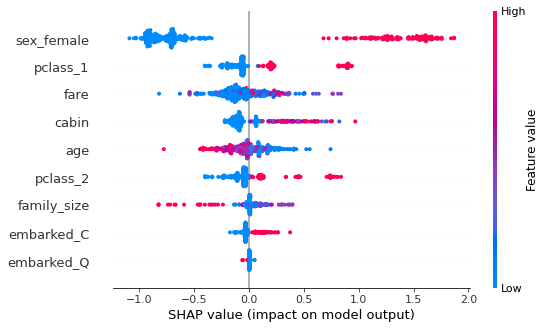

In [ ]:
# SHAP Summary Plot for our 
project_xg.demistify_model(model_.best_estimator_,X_test)

### Examining Predictions

We create a copy of the test set and add columns for the model's predicted value, and whether or not the prediction was correct.

In [9]:
compar = pd.DataFrame(base_truth_array)
compar['predicted'] = predicted_array
compar['correct_pred'] = compar['survived'] == compar['predicted']
compar = df.merge(compar, how = 'inner', left_index=True, right_index=True)
compar

,pclass,survived_x,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived_y,predicted,correct_pred
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1,1,True
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0,0,True
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI",0,0,True
13,1,1,"Barber, Miss. Ellen 'Nellie'",female,26.0000,0,0,19877,78.8500,NaN,S,6,NaN,NaN,1,1,True
15,1,0,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S,NaN,NaN,"New York, NY",0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,3,0,"Wittevrongel, Mr. Camille",male,36.0000,0,0,345771,9.5000,NaN,S,NaN,NaN,NaN,0,0,True
1302,3,0,"Yousif, Mr. Wazli",male,NaN,0,0,2647,7.2250,NaN,C,NaN,NaN,NaN,0,0,True
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,0,1,False
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,0,0,True


In [10]:
compar_xg = pd.DataFrame(base_truth_array_xg)
compar_xg['predicted'] = predicted_array_xg
compar_xg['correct_pred'] = compar_xg['survived'] == compar_xg['predicted']
compar_xg = df.merge(compar_xg, how = 'inner', left_index=True, right_index=True)
compar_xg

,pclass,survived_x,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived_y,predicted,correct_pred
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1,0,False
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0,0,True
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI",0,0,True
13,1,1,"Barber, Miss. Ellen 'Nellie'",female,26.0000,0,0,19877,78.8500,NaN,S,6,NaN,NaN,1,1,True
15,1,0,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S,NaN,NaN,"New York, NY",0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,3,0,"Wittevrongel, Mr. Camille",male,36.0000,0,0,345771,9.5000,NaN,S,NaN,NaN,NaN,0,0,True
1302,3,0,"Yousif, Mr. Wazli",male,NaN,0,0,2647,7.2250,NaN,C,NaN,NaN,NaN,0,0,True
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,0,1,False
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,0,0,True


We can use a confusion matrix to visualize 

In [11]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(compar_xg['correct_pred'], compar_xg['predicted'])
# conf_norm = confusion_matrix(compar['correct_pred'], compar['predicted'], normalize='true')
conf

array([[ 43,  16],
       [187,  82]])

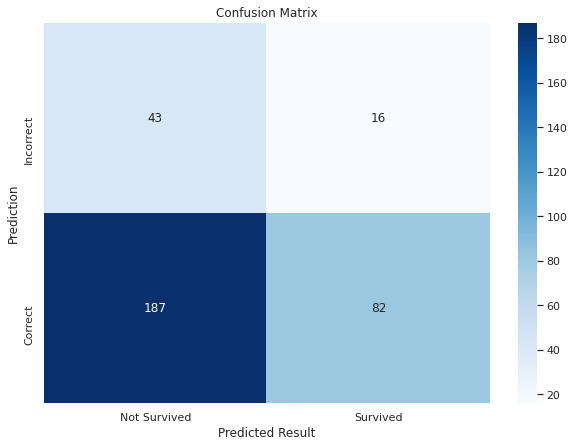

In [12]:
plt.figure(figsize=(10,7));
sns.heatmap(conf, cmap = 'Blues', annot = True, fmt = 'g',xticklabels = ['Not Survived', 'Survived'], yticklabels=['Incorrect', 'Correct']);

plt.xlabel('Predicted Result');

plt.ylabel('Prediction');
plt.title('Confusion Matrix');

> Metrics:

In [13]:
metrics_xg_df

,accuracy,precision,recall,f1_score,roc_auc
0,0.820122,0.836735,0.656,0.735426,0.788591


In [14]:
CP = conf[1].sum()
TotP = conf.flatten().sum()
AP = CP / TotP
print('Correct Predictions: {} \nTotal Predictions: {} \nAccuracy: {}\n\n'.format(CP, TotP, round(AP,3)))

TP = conf[1][1]
FP = conf[0][1]
Pr = TP / (TP + FP)
print('True Positives: {} \nFalse Positives: {} \nPrecision: {}\n'.format(TP, FP, round(Pr,3)))

TP = conf[1][1]
FN = conf[0][0]
Rc = TP / (TP + FN)
print('True Positives: {} \nFalse Negatives: {}\nRecall: {}\n'.format(TP,FN,round(Rc, 3)))

# TP = conf[1][1]
# TotPos = conf[0][0] + conf[1][1]
# Sen = TP / TotPos
# print('True Positives: {} \nTotal Positives: {} \nSensitivity: {} \n'.format(TP, TotPos, round(Sen, 3)))

TN = conf[1][0]
N = conf[1][0] + conf[0][1]
Sp = TN / N
print('True Negatives: {} \nTotal Negatives: {} \nSpecificity: {} \n'.format(TN, N, round(Sp, 3)))




Correct Predictions: 269 
Total Predictions: 328 
Accuracy: 0.82


True Positives: 82 
False Positives: 16 
Precision: 0.837

True Positives: 82 
False Negatives: 43
Recall: 0.656

True Negatives: 187 
Total Negatives: 203 
Specificity: 0.921 



Out of 328 records we had:
* 43 false negatives (predicted a passenger would not survive when they did) 
* 16 false positives (predicted a passenger would survive when they did not)

We create a dataframe of only incorrect predictions so we can examine the characteristics of the passengers our model misclassified.

In [15]:
wrong_pred = compar_xg[compar_xg['correct_pred'] == False]
wrong_pred.head()

,pclass,survived_x,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived_y,predicted,correct_pred
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1,0,False
56,1,1,"Carter, Mr. William Ernest",male,36.0000,1,2,113760,120.00,B96 B98,S,C,NaN,"Bryn Mawr, PA",1,0,False
64,1,1,"Chambers, Mr. Norman Campbell",male,27.0000,1,0,113806,53.10,E8,S,5,NaN,"New York, NY / Ithaca, NY",1,0,False
68,1,1,"Chevre, Mr. Paul Romaine",male,45.0000,0,0,PC 17594,29.70,A9,C,7,NaN,"Paris, France",1,0,False
91,1,1,"Dick, Mr. Albert Adrian",male,31.0000,1,0,17474,57.00,B20,S,3,NaN,"Calgary, AB",1,0,False


In [16]:
correct_pred = compar_xg[compar_xg['correct_pred'] == True]
correct_pred.head()

,pclass,survived_x,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived_y,predicted,correct_pred
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0,0,True
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI",0,0,True
13,1,1,"Barber, Miss. Ellen 'Nellie'",female,26.0,0,0,19877,78.8500,NaN,S,6,NaN,NaN,1,1,True
15,1,0,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S,NaN,NaN,"New York, NY",0,0,True
18,1,1,"Bazzani, Miss. Albina",female,32.0,0,0,11813,76.2917,D15,C,8,NaN,NaN,1,1,True


**Visualising Incorrect Predictions**

False Negatives

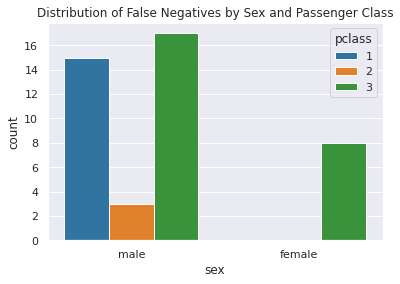

In [17]:
sns.countplot(data = wrong_pred[wrong_pred['survived_x'] == 1], x = 'sex', hue = 'pclass');
# plt.ylim(0, 100);
plt.title('Distribution of False Negatives by Sex and Passenger Class');

False Positives

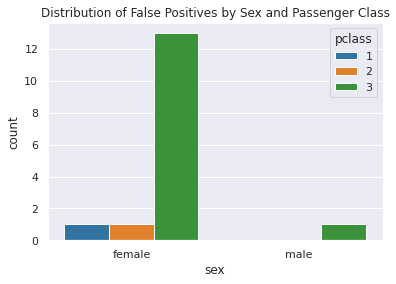

In [18]:
sns.countplot(data = wrong_pred[wrong_pred['survived_x'] == 0], x = 'sex', hue = 'pclass');
# plt.ylim(0, 35);
plt.title('Distribution of False Positives by Sex and Passenger Class');

These two countplots show that there are patterns in the way our model misclassified data. 
* Male passengers more likely to be misclassified as not surviving when they did
* Female passengers more likely to be misclassified as surviving when they did not
  * Almost all false positives were 3rd class female passengers

> 90% of passengers model predicted to survive were female:

In [49]:
compar_xg[(compar_xg['predicted'] == 1) & (compar_xg['sex'] == 'female')].shape[0] / compar_xg[(compar_xg['predicted'] == 1)].shape[0]

0.9081632653061225

> 89% of passengers model predicted to not survive were male:

In [50]:
compar_xg[(compar_xg['predicted'] == 0) & (compar_xg['sex'] == 'male')].shape[0] / compar_xg[(compar_xg['predicted'] == 0)].shape[0]

0.8956521739130435

**Visualising Correct Predictions**

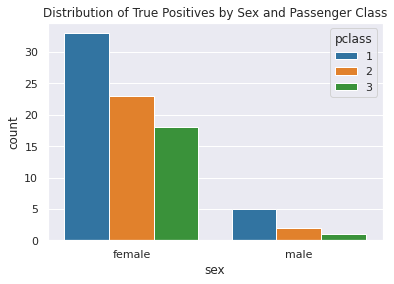

In [55]:
sns.countplot(data = correct_pred[correct_pred['survived_x'] == 1], x = 'sex', hue = 'pclass');
plt.title('Distribution of True Positives by Sex and Passenger Class');

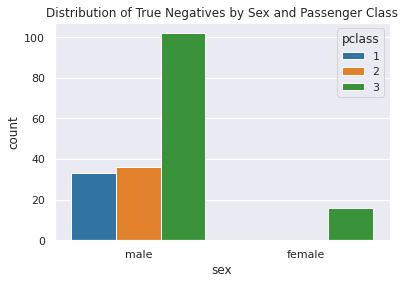

In [ ]:
sns.countplot(data = correct_pred[correct_pred['survived_x'] == 0], x = 'sex', hue = 'pclass');
plt.title('Distribution of True Negatives by Sex and Passenger Class');

# 775 Notebook 

## Titanic Dataset: Who Most Likely Survived? 

---



#### By Cohort B Team 6: (Sylar)Jiajian Guo, Lequn Yu, Qiqi Tang, Scott McCoy, Tiam Moradi

### Import Packages and Titanic Dataset

In [ ]:
%%bigquery 
SELECT * 
FROM `ba775-team-6b.Project.passengers`

### Preview of the Dataset

In [ ]:
%%bigquery
SELECT *
FROM `ba775-team-6b.Project.passengers`
LIMIT 5

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest
0,3,0,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,None,S,None,261.0,None
1,1,0,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,A36,S,None,NaN,"Belfast, NI"
2,1,0,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,0,0,112051,0.0,None,S,None,NaN,"Liverpool, England / Belfast"
3,1,0,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0,B102,S,None,NaN,None
4,1,0,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,None,110.0,None


### How many people survived the Titanic shipwrek? 

---



The first question we asked was how many people in the dataset survived the accident, and what is the overall survival rate. With 500 passengers survived out of 1309 in total, only 38 percent of people survived.

The titanic dataset has a number of features about each passenger that could be used as indicators affecting their chances of surviving. We analyzed each feature independently and found that the most significant indicators of survival were sex, passenger class, and age. Our analysis focuses on these features, but also discusses other relevant features that have potential predictive capability.

In [ ]:
%%bigquery
SELECT count(CASE WHEN survived = 1 THEN 1 ELSE NULL END) AS number_of_survivors
FROM `ba775-team-6b.Project.passengers`


,number_of_survivors
0,500


In [ ]:
%%bigquery
SELECT count(*) AS number_of_passengers
FROM `ba775-team-6b.Project.passengers`

,number_of_passengers
0,1309


In [ ]:
%%bigquery
SELECT (count(CASE WHEN survived = 1 THEN 1 ELSE NULL END) / count(*)) * 100 AS passenger_survival_percentage
FROM `ba775-team-6b.Project.passengers`

,passenger_survival_percentage
0,38.197097


### Survival by Sex 

After calculating survival rates based on sex, we found that female passengers had a significantly higher survival rate at 72 percent, to male passengers at 19 percent.

In [ ]:
%%bigquery
SELECT sex, count(*) Number_Passengers, sum(survived) Number_Survivors, (sum(survived) / count(*)) Survival_Percentage 
FROM `ba775-team-6b.Project.passengers`
GROUP BY sex
#comparing survival statistics of male and female passengers

,sex,Number_Passengers,Number_Survivors,Survival_Percentage
0,male,843,161,0.190985
1,female,466,339,0.727468


### Survival by Passenger Class

When looking into survival rate based on passenger class, we see that class 1 had the highest survival rate of 61 percent, followed by class 2 with 42 percent, and finally class 3 with 25 percent. One thing to also notice is that there are more passengers in class 3 than class 1 and class 2 combined. Our hypothesis for why there is a big disparity of the survival rates is because of the locations of the passenger rooms on the titanic for a different passenger classes.

In [ ]:
%%bigquery
SELECT pclass, count(*) Number_Passengers, sum(survived) Number_Survivors, (sum(survived) / count(*)) Survival_Percentage 
FROM `ba775-team-6b.Project.passengers`
GROUP BY pclass
ORDER BY pclass
#comparing survival rate between passenger classes

,pclass,Number_Passengers,Number_Survivors,Survival_Percentage
0,1,323,200,0.619195
1,2,277,119,0.429603
2,3,709,181,0.255289


### Survival by Age Group

Following the theme of analyzing survival rates based on different factors, we decided to compare the survival rates based on age. We define a child is a person under 18, an adult is a person between the ages of 18 and 50, and Elder as a person over 50 years old. Children had the highest survival rate, followed by adults and elderly. With the dataset, we also see that there was a quite large group created called None which means we had Null values within the age column of our dataset. The Elder's survival rate is not very meaningful due to its lack of data number of only 15.

In [ ]:
%%bigquery
WITH AGEGROUP AS

(SELECT *, 
CASE WHEN age > 0 AND age < 18 THEN  'Child'
WHEN  age > 17.999 AND age  < 50 THEN 'Adult'
WHEN age <=50  THEN 'Elder'
ELSE NULL END AS age_group
FROM `ba775-team-6b.Project.passengers`
)

SELECT age_group, count(*) Number_Passengers, sum(survived) Number_Survivors, (sum(survived) / count(*)) Survival_Percentage 
FROM AGEGROUP
GROUP BY age_group
#comparing survival rate between age groups

,age_group,Number_Passengers,Number_Survivors,Survival_Percentage
0,None,358,111,0.310056
1,Adult,782,302,0.386189
2,Child,154,81,0.525974
3,Elder,15,6,0.400000


### Survival by Passenger's Number of Siblings / Spouces

First aspect to note is that 891 passengers did not have a sibling or a spouse, yet this demographic contributed to over 68 percent of the population. It is also interesting that the group with the highest survival rate had atleast a spouse or siblings on board the Titanic. Once we look at passnegers having 2 siblings or more, we see a decline in the survival rate.

In [ ]:
%%bigquery
SELECT SibSp, count(*) Number_Passengers, sum(survived) Number_Survivors, (sum(survived) / count(*)) Survival_Percentage 
FROM `ba775-team-6b.Project.passengers`
GROUP BY SibSp
ORDER BY SibSp
#comparing survival rate between passenger numbers of siblings / spouses aboard  

,SibSp,Number_Passengers,Number_Survivors,Survival_Percentage
0,0,891,309,0.346801
1,1,319,163,0.510972
2,2,42,19,0.452381
3,3,20,6,0.300000
4,4,22,3,0.136364
5,5,6,0,0.000000
6,8,9,0,0.000000


### Survival by Port Embarked

Here are able to get a sense of where the passengers have arrived from.

In [ ]:
%%bigquery
SELECT 
CASE
WHEN embarked = 'C' THEN 'Cherbourg, France'
WHEN embarked = 'Q' THEN 'Queenstown, Ireland'
WHEN embarked = 'S' THEN 'Southampton, England'
END AS port_of_embarkation, count(*) Number_Passengers, sum(survived) Number_Survivors, (sum(survived) / count(*)) Survival_Percentage 
FROM `ba775-team-6b.Project.passengers`
WHERE embarked IS NOT NULL
GROUP BY embarked
ORDER BY embarked
#comparing survival rate between passenger with different ports embarked

,port_of_embarkation,Number_Passengers,Number_Survivors,Survival_Percentage
0,"Cherbourg, France",270,150,0.555556
1,"Queenstown, Ireland",123,44,0.357724
2,"Southampton, England",914,304,0.332604


Further analysis shows us that Cherbourg, the port with the highgest survival percentage, also had the highest share of first class passengers. 

In [ ]:
%%bigquery
SELECT
  CASE
    WHEN embarked = 'C' THEN 'Cherbourg, France'
    WHEN embarked = 'Q' THEN 'Queenstown, Ireland'
    WHEN embarked = 'S' THEN 'Southampton, UK'
END
  AS port_of_embarkation,
    pclass,
  COUNT(*) Number_Passengers,

  
FROM
  `ba775-team-6b.Project.passengers`
WHERE
  embarked IS NOT NULL
GROUP BY
  embarked,
  pclass
ORDER BY
  embarked,
  pclass

,port_of_embarkation,pclass,Number_Passengers
0,"Cherbourg, France",1,141
1,"Cherbourg, France",2,28
2,"Cherbourg, France",3,101
3,"Queenstown, Ireland",1,3
4,"Queenstown, Ireland",2,7
5,"Queenstown, Ireland",3,113
6,"Southampton, UK",1,177
7,"Southampton, UK",2,242
8,"Southampton, UK",3,495


### Survival by Fare Group 

Here we have define the fare to be cheap if the price was under 10 dollars, if the fair was over 10 but less than 30 dollars then its mid , and if the fare price was over 30 dollars, then we would define that as expensive. There was also a big portion of the passengers that missing values, however for the data that we do have, mid level fare prices had the highest survival rate, followed by expensive and cheap fare tickets. The expensive's survival rate is not very meaningful here due to the lack of number of data. Our hypothesis is the more passengers pay, the higher the rate of survival. 

In [ ]:
%%bigquery
WITH FAREGROUP AS

(SELECT *, 
CASE WHEN fare > 0 AND fare < 10 THEN  'Cheap'
WHEN  fare >= 10 AND fare  < 30 THEN 'Mid'
WHEN fare >= 30  THEN 'Expensive'
ELSE NULL END AS fare_group
FROM `ba775-team-6b.Project.passengers`
)

SELECT fare_group, count(*) Number_Passengers, sum(survived) Number_Survivors, (sum(survived) / count(*)) Survival_Percentage 
FROM FAREGROUP
GROUP BY fare_group
#comparing survival rate between passenger with different fare paid

,fare_group,Number_Passengers,Number_Survivors,Survival_Percentage
0,None,18,2,0.111111
1,Cheap,474,108,0.227848
2,Mid,467,188,0.402570
3,Expensive,350,202,0.577143


After performing our initial exploratory data analysis we found that sex, passenger class, and age were most associated with an increased chance of survival. We also saw some correlation between our features that might distort the predictive value of any variable. Our next step would be to develop and tune a machine learning model to best make predictions about survival based on data.

### Who Most Likely Survived: Machine Learning

Our team attempted to predict whether passengers would survived the Titanic accident. Since our dataset is only two labels, survived and not survived, we are going to solving a binary classification problem. Our algorithm of choice is Logisitic Regression. Below is how we structured our steps leading up to evaluating the test set. 

#### Preprocessing the Dataset
The first cell shows preprocessed features that are going to be using for our classification model. 
Since the majority of our data is text, we wanted to one hot encode features such as sex, Embarked, and Pclass. 
with utilizing Logisitic Regression, having one hot encodinged data will improve the model's performance because 
our features will be transformed from label encoded features to numerical encoded features. 
We also standardized the age and fare columns, this was done in order for gradient descent to have the best 
trajectory towards the global minimum. If we kept age and fare as their original values,
those two features would dominate the contribution of predictions and direction of gradient descent, as their as their parameters would be the largest values and gradients. Finally, we did utilize one feature that was label encoded calledName title, this was generated by going through and labelling the most common names on board, along with a group of titles that were rare. We generated this feature to see if there were any patterns with titles and survival the model could discover.

I also used the RAND() function to create random values for the whole dataset, and then used a WHERE condition to 
filter the data into a training and test set. Since the numbers are randomly generated, we can consider this to be a random
shuffle of the data.


#### Model Performance 
We can see that the model does perform well. When evaluating the test set, our metrics are as follows: 

- **Accuracy: %** 
- **Area Under the ROC curve: 84.6%**
- **Precision: 83.6%**
- **Recall: 61.8%**
- **F1:score 71%**

Overall I believe that this is a good baseline score, but much can be improved. Although the accuracy is 80 percent, we can see that the model is learning parameters to fit well to the positive class; that is, the Logisitic Regression is learning patterns for people who survived the Titanic accident and is having a hard time learning patterns for the people who did not survive the accident. We know this because we have a significantly higher precision score in comparison to recall ; Our precision score is an indicator of how well our model is learning true positives, and recall is an indicator of how well our model is learning true negatives. This could also potentially suggest that the distribution of the negative class is more scattered and thus producing more 
false negatives. 

Finally, I also utilized L1 regularization to the model in order to reduce overfitting, however it seems that this was not possible. One way to combat this is to increase the value for lambda, which represent how severe the regularization will be; although one would need to be careful, as a lambda value too large would cause the model
to suffer from high bias and underfit.

### Feature Importance
After the model has trained, we are able to 

#### Limitations
One of the limitations is the amount of the data we have to train the model. There were roughly 1300 data points and thus naturally difficult to be able to generalize to the test set well. In addition, because this dataset is of the Titantic accident, there is no other method of curating additional information that regards the passengers. 

Another limitation was certain features had null values. While we are able to impute these values, it is still rather difficult to tell if the values were a true representative of the missing passengers age's. Perhaps if we were able to use models such as XGBoost or CATboost,these null values would not be as bad of an issue 




In [ ]:
%%bigquery 
CREATE OR REPLACE TABLE `ba775-team-6b.Project.preprocessed_data` as (SELECT  Survived,
CASE WHEN Sex = 'male' Then 1 Else 0 END as isMale,
CASE WHEN Sex = 'female' Then 1 Else 0 End as isFemale,
CASE WHEN Pclass = 1 THEN 1 ELSE 0 END as Pclass1,
CASE WHEN Pclass = 2 THEN 1 ELSE 0 END as Pclass2,
CASE WHEN Pclass = 3 THEN 1 ELSE 0 END as Pclass3,
SibSp,
Parch,
 Age,
Fare, 
CASE WHEN Embarked = 'S' THEN 1 Else 0 END as Embarked_S,
CASE WHEN Embarked = 'Q' THEN 1 ELSE 0 END as Embarked_B,
CASE WHEN Embarked = 'C' THEN 1 ELSE 0 END as Embarked_C,
CASE WHEN RAND() < .3 OR RAND() > .6 THEN 'Training'
     WHEN RAND() >=.3 OR RAND() <= .6 THEN 'Test' 
     ELSE 'Training'
     END as data_split
FROM `ba775-team-6b.Project.passengers`)

""


In the next two cells, we are going to be using the data_split feature in order to parition the table into a training and test set to feed into the model.

In [ ]:
%%bigquery 
CREATE OR REPLACE table  `ba775-team-6b.Project.preprocessed_data_train` as (
SELECT * FROM `ba775-team-6b.Project.preprocessed_data`
WHERE data_split = 'Training')


""


In [ ]:
%%bigquery
CREATE OR REPLACE table  `ba775-team-6b.Project.preprocessed_data_test` as (
SELECT * FROM `ba775-team-6b.Project.preprocessed_data`
WHERE data_split = 'Test')


""


The following cells are going to train and evaluate the model

In [ ]:
%%bigquery
CREATE OR REPLACE MODEL `ba775-team-6b.Project.classification_model`
OPTIONS(model_type='logistic_reg',L1_REG=5,labels = ['survived'])
AS
SELECT * EXCEPT(data_split) FROM `ba775-team-6b.Project.preprocessed_data_train`

Executing query with job ID: 3fbeef50-507d-43c4-bb4f-ea54e8564466
Query executing: 33.20s

In [ ]:
%%bigquery
SELECT *
FROM ML.EVALUATE
(
    MODEL `ba775-team-6b.Project.classification_model`,  
    (SELECT * EXCEPT(data_split) FROM `ba775-team-6b.Project.preprocessed_data_test`)
)

In [ ]:
%%bigquery 
Select processed_input,weight FROM 
ML.WEIGHTS(MODEL `ba775-team-6b.Project.classification_model`)


,processed_input,weight
0,isMale,-1.245611
1,isFemale,1.245611
2,Pclass1,0.842362
3,Pclass2,0.047250
4,Pclass3,-0.674006
5,SibSp,-0.360413
6,Parch,0.029848
7,Age,-0.032482
8,Fare,0.001287
9,Embarked_S,-0.314759
